In [1]:
import spatialdata as sd
from spatialdata.transformations import set_transformation, Affine
from spatialdata.models import ShapesModel
from spatialdata.transformations import (
    align_elements_using_landmarks,
    get_transformation_between_landmarks,
)
from spatialdata import SpatialData
from spatialdata.transformations import (
    BaseTransformation,
    Sequence,
    get_transformation,
    set_transformation,
    Translation
)

import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import xarray as xr
import sopa
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping
from rasterio.features import rasterize
from scipy import ndimage

import sys
import os
sys.path.append(os.path.abspath('/media/Lynn/scripts/src'))
import load_sdata, align_sdata

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


## Load the data 

In [2]:
sdata_codex_s1 = load_sdata.get_codex_columns_data('0022110')
sdata_xenium_s1 = load_sdata.get_xenium_slide_data('0022110')                                                

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring key

In [ ]:
sdata_codex_s2 = load_sdata.get_codex_columns_data('0022111')
sdata_xenium_s2 = load_sdata.get_xenium_slide_data('0022111') 

## Align column by column 

### Using Xenium Explorer alignment matrices from cropped CODEX columns

In [3]:
slide_1_aligned_data = align_sdata.align_slide_columns(
    codex_sdata_dict=sdata_codex_s1,  
    xenium_sdata_dict=sdata_xenium_s1,  
    slide_id="0022110")

Processing slide 0022110, column_2...
Successfully aligned and merged slide 0022110, column_2
Processing slide 0022110, column_3...
Successfully aligned and merged slide 0022110, column_3
Processing slide 0022110, column_4...
Successfully aligned and merged slide 0022110, column_4
Processing slide 0022110, column_1...
Successfully aligned and merged slide 0022110, column_1


In [ ]:
slide_2_aligned_data = align_sdata.align_slide_columns(
    codex_sdata_dict=sdata_codex_s2,  
    xenium_sdata_dict=sdata_xenium_s2,  
    slide_id="0022111")

In [4]:
slide_1_aligned_data

{'column_2': SpatialData object, with associated Zarr store: /media/Lynn/data/SpatialData/Xenium/output-XETG00404__0022110__Region_2__20250117__150604.zarr
 ├── Images
 │     ├── 'ID_0022110_column_2': DataTree[cyx] (27, 41487, 4981), (27, 20743, 2490), (27, 10371, 1245), (27, 5185, 622), (27, 2592, 311)
 │     └── 'morphology_focus': DataTree[cyx] (5, 74758, 14303), (5, 37379, 7151), (5, 18689, 3575), (5, 9344, 1787), (5, 4672, 893)
 ├── Labels
 │     ├── 'cell_labels': DataTree[yx] (74758, 14303), (37379, 7151), (18689, 3575), (9344, 1787), (4672, 893)
 │     └── 'nucleus_labels': DataTree[yx] (74758, 14303), (37379, 7151), (18689, 3575), (9344, 1787), (4672, 893)
 ├── Points
 │     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
 ├── Shapes
 │     ├── 'cell_boundaries': GeoDataFrame shape: (115838, 1) (2D shapes)
 │     ├── 'cell_circles': GeoDataFrame shape: (115838, 2) (2D shapes)
 │     └── 'nucleus_boundaries': GeoDataFrame shape: (113412, 1) (2D shapes)
 └─

#### Visualize on Xenium Explorer: Xenium cell boundaries on top of CODEX image
CODEX image is flipped 180 degrees, even though it appears correctly on Napari

In [9]:
del slide_1_aligned_data['column_1'].tables['table']
sopa.io.explorer.write(Path('../data/Aligned_Xenium_Explorer_data/aligned_s1_c1'), slide_1_aligned_data['column_1'], image_key = 'ID_0022110_column_1', shapes_key = 'cell_boundaries')

[INFO] (sopa.io.explorer.shapes) Writing 144062 cell polygons
[WARNING] (sopa.io.explorer.points) Some transcripts are located outside of the image (pixels < 0)
[INFO] (sopa.io.explorer.points) Writing 10207360 transcripts
[INFO] (sopa.io.explorer.points)    > Level 0: 10207360 transcripts
[INFO] (sopa.io.explorer.points)    > Level 1: 2551840 transcripts
[INFO] (sopa.io.explorer.points)    > Level 2: 637960 transcripts
[INFO] (sopa.io.explorer.points)    > Level 3: 159490 transcripts
[INFO] (sopa.io.explorer.points)    > Level 4: 39872 transcripts
[INFO] (sopa.io.explorer.points)    > Level 5: 9968 transcripts
[INFO] (sopa.io.explorer.points)    > Level 6: 2492 transcripts
[INFO] (sopa.io.explorer.images) Writing multiscale image with procedure=semi-lazy (load in memory when possible)
Writing tiles: 100%|█████████▉| 5534/5535 [01:29<00:00, 62.08it/s]
[INFO] (sopa.io.explorer.images)    (Loading image of shape (27, 20743, 2490)) in memory
[INFO] (sopa.io.explorer.images)    > Image of 

#### Check CODEX image orientation in Python

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.437800845828527].


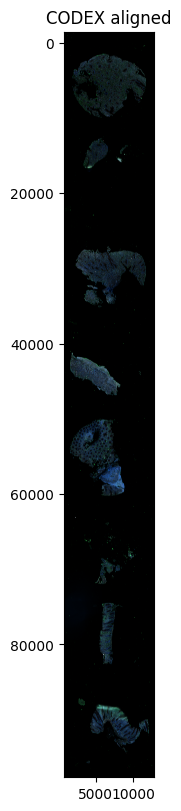

In [22]:
slide_1_aligned_data['column_1'].pl.render_images("ID_0022110_column_1").pl.show(
    coordinate_systems='global', 
    title="CODEX aligned",
    figsize=(15, 8),
)

## Reduce Xenium cell segments by a given percentage

In [6]:
s1_c1_sdata = slide_1_aligned_data['column_1']
s1_c1_adata = s1_c1_sdata.tables['table']

In [26]:
s1_c1_adata.obs # Reduce cell_area as well?

,cell_id,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,nucleus_count,segmentation_method,region,z_level,cell_labels
0,aaaahohd-1,0,0,0,0,0,0,0,130.682192,NaN,0.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_circles,0.0,1
1,aaaanoph-1,0,0,0,0,0,0,0,57.348440,NaN,0.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_circles,0.0,2
2,aaabbmbo-1,0,0,0,0,0,0,0,102.595004,NaN,0.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_circles,0.0,3
3,aaabfeja-1,41,0,0,0,0,0,41,24.926251,NaN,0.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_circles,0.0,4
4,aaabincm-1,80,0,0,0,0,0,80,32.873751,21.313751,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_circles,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144057,oihofcan-1,0,0,0,0,0,0,0,115.148442,9.844063,1.0,Segmented by nucleus expansion of 5.0µm,cell_circles,4.0,144058
144058,oiholgic-1,1,0,0,0,0,0,1,116.367660,8.805469,1.0,Segmented by nucleus expansion of 5.0µm,cell_circles,4.0,144059
144059,oihomijn-1,1,0,0,0,0,0,1,132.443286,8.805469,1.0,Segmented by nucleus expansion of 5.0µm,cell_circles,4.0,144060
144060,oihpbbno-1,0,0,0,0,0,0,0,122.192817,7.992657,1.0,Segmented by nucleus expansion of 5.0µm,cell_circles,4.0,144061


In [51]:
s1_c1_sdata.shapes['cell_circles']

,geometry,radius
cell_id,,
aaaahohd-1,POINT (89.942 32.088),6.449607
aaaanoph-1,POINT (104.746 24.591),4.272537
aaabbmbo-1,POINT (95.186 20.843),5.714631
aaabfeja-1,POINT (657.897 727.552),2.816784
aaabincm-1,POINT (657.754 732.816),3.234817
...,...,...
oihofcan-1,POINT (1372.428 14476.955),6.054163
oiholgic-1,POINT (1357.451 14474.833),6.086130
oihomijn-1,POINT (1396.602 14470.059),6.492920


In [5]:
s1_c1_sdata_shrunken_boundaries = align_sdata.shrink_cell_boundaries_in_sdata(s1_c1_sdata, reduction_percentage = 0.2)

In [37]:
s1_c1_sdata_shrunken_boundaries.shapes['shrunken_cell_boundaries']

,geometry
aaaahohd-1,"POLYGON ((86.765 23.652, 86.028 24.021, 85.299..."
aaaanoph-1,"POLYGON ((102.461 21.222, 101.466 21.62, 100.4..."
aaabbmbo-1,"POLYGON ((93.806 15.133, 90.094 18.226, 89.713..."
aaabfeja-1,"POLYGON ((656.05 725.379, 655.679 725.935, 655..."
aaabincm-1,"POLYGON ((658.596 729.655, 658.426 729.826, 65..."
...,...
oihofcan-1,"POLYGON ((1371.859 14470.465, 1371.298 14471.5..."
oiholgic-1,"POLYGON ((1357.497 14468.351, 1356.92 14468.54..."
oihomijn-1,"POLYGON ((1395.628 14462.904, 1393.29 14463.87..."
oihpbbno-1,"POLYGON ((1420.221 14484.514, 1419.23 14485.10..."


#### Visualize in Xenium Explorer

In [7]:
del s1_c1_sdata_shrunken_boundaries.tables['table']
sopa.io.explorer.write(Path('../data/Aligned_Xenium_Explorer_data/aligned_s1_c1_shrunken20'), s1_c1_sdata_shrunken_boundaries, image_key = 'ID_0022110_column_1', shapes_key = 'shrunken_cell_boundaries')

[INFO] (sopa.io.explorer.shapes) Writing 144062 cell polygons
[WARNING] (sopa.io.explorer.points) Some transcripts are located outside of the image (pixels < 0)
[INFO] (sopa.io.explorer.points) Writing 10207360 transcripts
[INFO] (sopa.io.explorer.points)    > Level 0: 10207360 transcripts
[INFO] (sopa.io.explorer.points)    > Level 1: 2551840 transcripts
[INFO] (sopa.io.explorer.points)    > Level 2: 637960 transcripts
[INFO] (sopa.io.explorer.points)    > Level 3: 159490 transcripts
[INFO] (sopa.io.explorer.points)    > Level 4: 39872 transcripts
[INFO] (sopa.io.explorer.points)    > Level 5: 9968 transcripts
[INFO] (sopa.io.explorer.points)    > Level 6: 2492 transcripts
[INFO] (sopa.io.explorer.images) Writing multiscale image with procedure=semi-lazy (load in memory when possible)
Writing tiles: 100%|█████████▉| 5534/5535 [01:37<00:00, 56.64it/s]
[INFO] (sopa.io.explorer.images)    (Loading image of shape (27, 20743, 2490)) in memory
[INFO] (sopa.io.explorer.images)    > Image of 